# Analisis de Muestra de los datos limpios

Se procede a hacer un Análisis de la Muestra luego de la limpieza de los datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Air Quality

### Importamos los datos

In [2]:
aire = pd.read_csv('../clean_data/air_quality_clean.csv')
aire = aire.sample(frac=0.5, random_state=42)

Tomamos una muestra del 50% de los datos

In [3]:
aire

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Data Value,year,month
14845,315632,646,Outdoor Air Toxics - Benzene,Annual average concentration,Âµg/m3,Citywide,1.0,New York City,1.6,2011,1
1632,167548,375,Nitrogen dioxide (NO2),Mean,ppb,CD,316.0,Brownsville (CD16),25.6,2008,12
14146,130444,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,Borough,5.0,Staten Island,0.1,2013,1
4866,410983,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,106.0,Stuyvesant Town and Turtle Bay (CD6),10.2,2015,12
1650,178414,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,9.9,2008,12
...,...,...,...,...,...,...,...,...,...,...,...
940,410759,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,202.0,Downtown - Heights - Slope,9.8,2015,12
2739,547428,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,303.0,East Harlem,10.1,2017,6
9376,827146,386,Ozone (O3),Mean,ppb,Borough,3.0,Manhattan,30.2,2022,6
14774,227602,646,Outdoor Air Toxics - Benzene,Annual average concentration,Âµg/m3,CD,311.0,Bensonhurst (CD11),1.7,2011,1


### Comprobamos nulos

In [4]:
aire.isnull().sum()

Unique ID         0
Indicator ID      0
Name              0
Measure           0
Measure Info      0
Geo Type Name     0
Geo Join ID       0
Geo Place Name    0
Data Value        0
year              0
month             0
dtype: int64

### Comprobamos duplicados

In [5]:
aire[aire.duplicated(keep=False)]

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Data Value,year,month


In [6]:
aire.describe()

,Unique ID,Indicator ID,Data Value,year,month
count,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000
mean,420074.470429,422.010444,16.851021,2014.375968,6.595048
std,245813.818994,106.504599,10.223075,4.401345,4.401426
min,121645.000000,365.000000,0.000000,2005.000000,1.000000
25%,175441.250000,365.000000,8.700000,2011.000000,1.000000
50%,338212.500000,375.000000,14.000000,2015.000000,6.000000
75%,649710.500000,386.000000,24.700000,2018.000000,12.000000
max,828353.000000,661.000000,53.100000,2022.000000,12.000000


In [7]:
aire.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8522 entries, 14845 to 8825
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       8522 non-null   int64  
 1   Indicator ID    8522 non-null   int64  
 2   Name            8522 non-null   object 
 3   Measure         8522 non-null   object 
 4   Measure Info    8522 non-null   object 
 5   Geo Type Name   8522 non-null   object 
 6   Geo Join ID     8522 non-null   object 
 7   Geo Place Name  8522 non-null   object 
 8   Data Value      8522 non-null   float64
 9   year            8522 non-null   int64  
 10  month           8522 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 798.9+ KB


### Vemos Outliers 

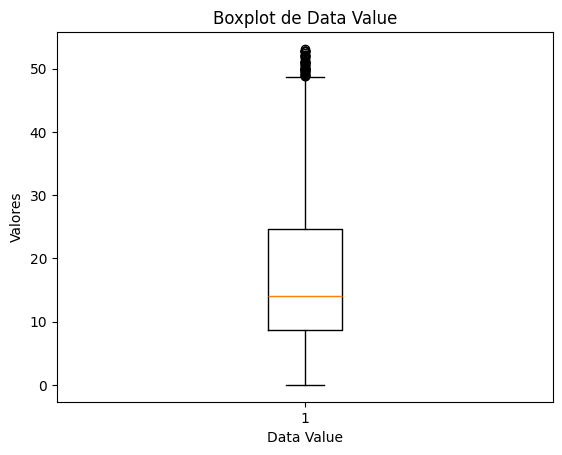

In [8]:
plt.boxplot(aire['Data Value'])
plt.title('Boxplot de Data Value')
plt.xlabel('Data Value')
plt.ylabel('Valores')
plt.show()

### Distribución de Data Value

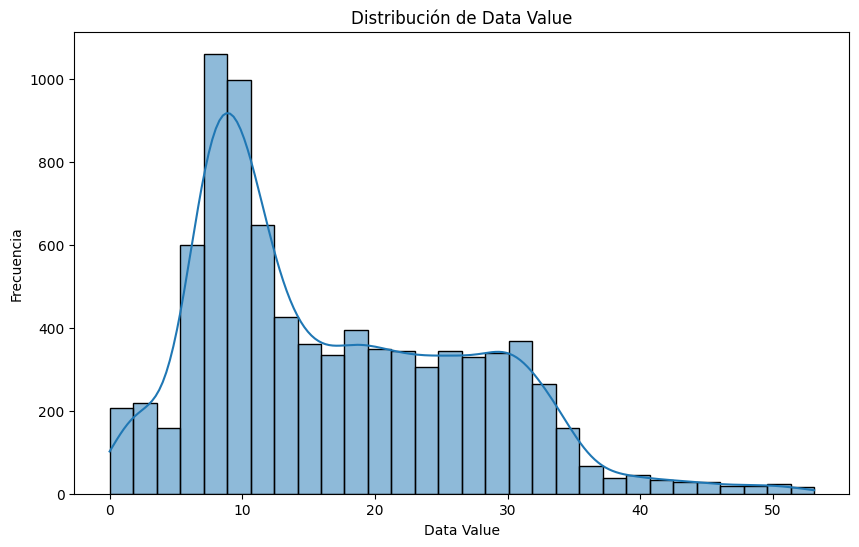

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(aire['Data Value'], bins=30, kde=True)
plt.title('Distribución de Data Value')
plt.xlabel('Data Value')
plt.ylabel('Frecuencia')
plt.show()

### Analizamos periodos de tiempo

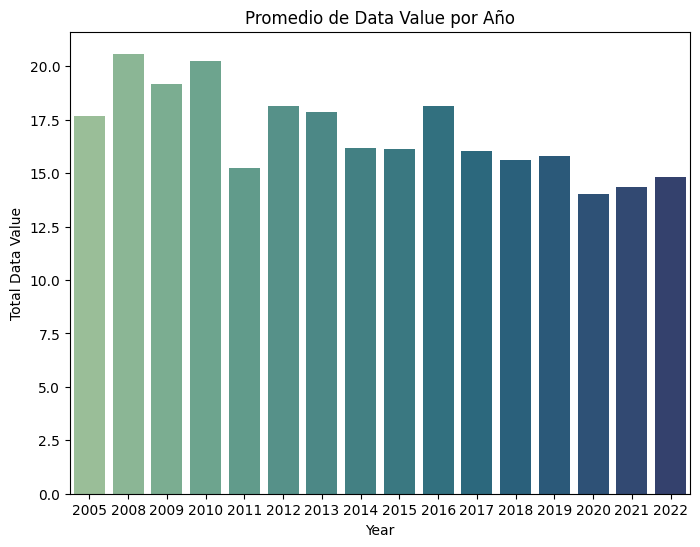

In [10]:
# Agrupar por 'year' y sacar el promedio los valores de 'Data Value'
aire_group = aire.groupby('year')['Data Value'].mean().reset_index()

# Establecer la paleta de colores 'crest' de seaborn


# Crear gráfico de barras (barplot)
plt.figure(figsize=(8, 6))
sns.barplot(x='year', y='Data Value', data=aire_group, palette='crest')

# Añadir etiquetas y título
plt.xlabel('Year')
plt.ylabel('Total Data Value')
plt.title('Promedio de Data Value por Año')

# Mostrar el gráfico
plt.show()

### Analizamos columnas geograficas

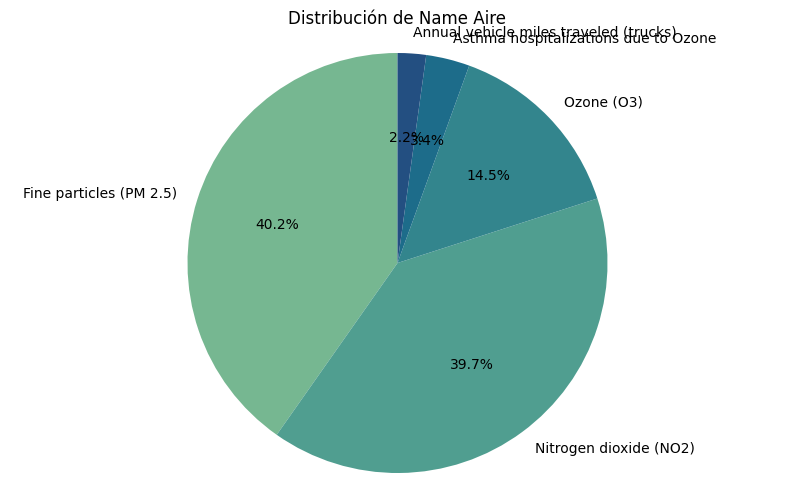

In [11]:
# Contamos las frecuencias de las categorías más comunes en 'Name'
name_aire = aire['Name'].value_counts().head(5)

# Crear el gráfico de torta
plt.figure(figsize=(10, 6))
plt.pie(name_aire, labels=name_aire.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("crest", len(name_aire)))

# Títulos y etiquetas
plt.title('Distribución de Name Aire')
plt.axis('equal') 

# Mostrar gráfico
plt.show()

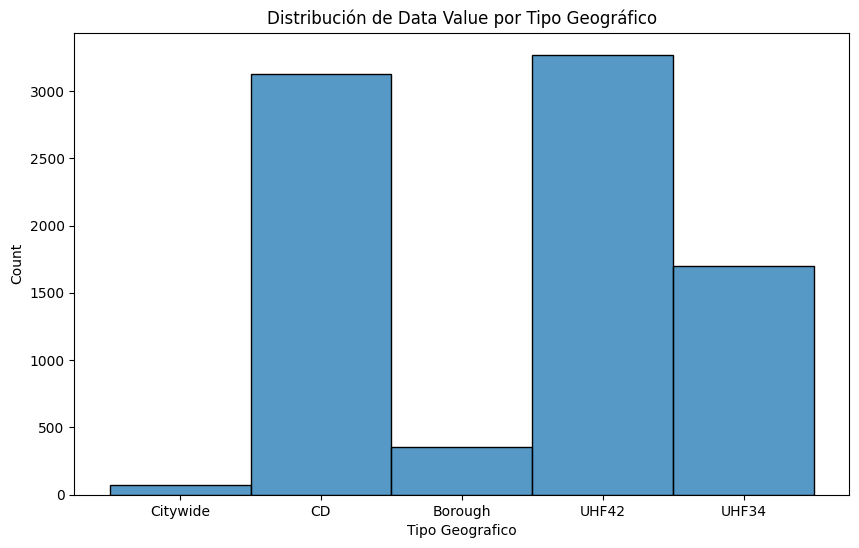

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(aire['Geo Type Name'], bins=30, discrete=True)
plt.title('Distribución de Data Value por Tipo Geográfico')
plt.xlabel('Tipo Geografico')
plt.show()

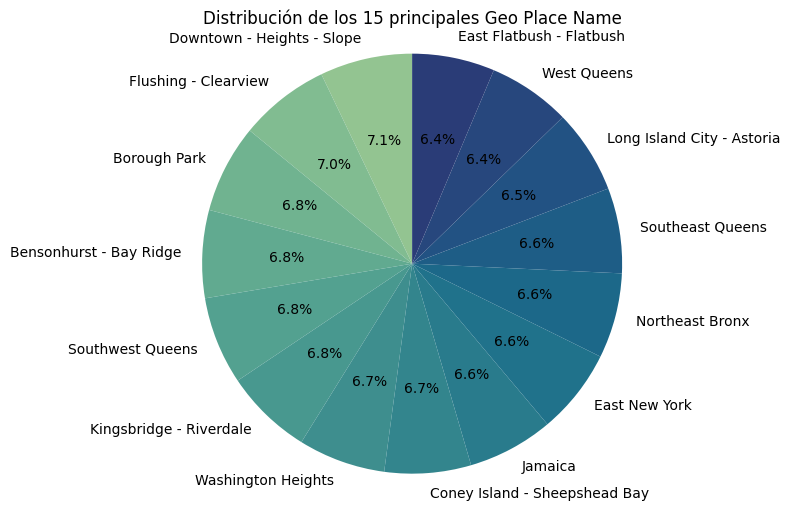

In [13]:
# Contamos las frecuencias de las categorías más comunes en 'Geo Place Name'
top_places = aire['Geo Place Name'].value_counts().head(15)

# Crear el gráfico de torta
plt.figure(figsize=(10, 6))
plt.pie(top_places, labels=top_places.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("crest", len(top_places)))

# Títulos y etiquetas
plt.title('Distribución de los 15 principales Geo Place Name')
plt.axis('equal') 

# Mostrar gráfico
plt.show()

### Mapa de correlacion

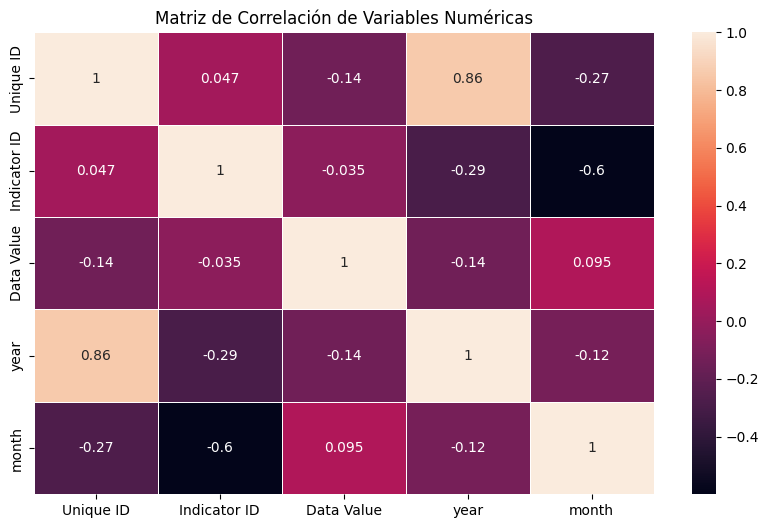

In [14]:
# Filtrar solo las columnas numéricas
aire_numeric = aire.select_dtypes(include=['number'])
# Verificar si alguna columna tiene todos los valores NaN y eliminarla
aire_numeric = aire_numeric.dropna(axis=1, how='all')
# Calcular la matriz de correlación
correlation_matrix = aire_numeric.corr()
# Crear un heatmap para visualizar la correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

## Noise Pollution

In [15]:
noise = pd.read_csv('../clean_data/noise_pollution_clean.csv')
noise = noise.sample(frac=0.5, random_state=42)

### Comprobamos Nulos

In [16]:
noise.isnull().sum()

borough                     0
block                       0
latitude                    0
longitude                   0
year                        0
month                       0
week                        0
day                         0
hour                        0
small-engine                0
medium-engine               0
large-engine                0
engine-of-uncertain-size    0
engine                      0
dtype: int64

### Comprobamos Duplicados

In [17]:
noise[noise.duplicated(keep=False)]

,borough,block,latitude,longitude,year,month,week,day,hour,small-engine,medium-engine,large-engine,engine-of-uncertain-size,engine
42777,Manhattan,523,40.72609,-73.99682,2017,12,50,1,13,No está presente,No está presente,No está presente,No está presente,No está presente
41724,Manhattan,523,40.72609,-73.99682,2017,10,43,1,9,No está presente,No está presente,No está presente,No está presente,No está presente
10820,Manhattan,556,40.73211,-73.98927,2017,7,28,6,2,No está presente,No está presente,No está presente,No está presente,No está presente
11607,Manhattan,568,40.73328,-73.99447,2017,10,41,1,10,No está presente,No está presente,No está presente,No está presente,No está presente
52439,Manhattan,535,40.72898,-73.99629,2018,7,29,4,22,No está presente,No está presente,No está presente,No está presente,No está presente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39087,Manhattan,546,40.72915,-73.99500,2017,2,7,1,8,No está presente,No está presente,No está presente,No está presente,No está presente
41245,Manhattan,1393,40.77632,-73.96372,2017,3,12,2,14,No está presente,No está presente,No está presente,No está presente,No está presente
36675,Manhattan,546,40.72981,-73.99586,2017,8,34,3,11,No está presente,No está presente,No está presente,No está presente,No está presente
60040,Manhattan,548,40.73059,-73.99479,2017,11,48,1,9,No está presente,No está presente,Si está presente,No está presente,Si está presente


In [18]:
noise.describe()

,block,latitude,longitude,year,month,week,day,hour
count,31011.000000,31011.000000,31011.000000,31011.000000,31011.000000,31011.000000,31011.000000,31011.000000
mean,594.960498,40.730378,-73.992975,2017.595434,6.405920,26.253749,2.906162,12.403566
std,253.576126,0.013439,0.010421,0.778134,3.705005,16.143688,1.931134,5.811792
min,75.000000,40.675170,-74.015760,2016.000000,1.000000,1.000000,0.000000,0.000000
25%,535.000000,40.728980,-73.996820,2017.000000,3.000000,11.000000,1.000000,8.000000
50%,547.000000,40.730330,-73.995000,2017.000000,7.000000,27.000000,3.000000,12.000000
75%,550.000000,40.731420,-73.992860,2018.000000,10.000000,41.000000,5.000000,17.000000
max,2613.000000,40.779910,-73.851840,2019.000000,12.000000,52.000000,6.000000,23.000000


In [19]:
noise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31011 entries, 42777 to 40420
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   borough                   31011 non-null  object 
 1   block                     31011 non-null  int64  
 2   latitude                  31011 non-null  float64
 3   longitude                 31011 non-null  float64
 4   year                      31011 non-null  int64  
 5   month                     31011 non-null  int64  
 6   week                      31011 non-null  int64  
 7   day                       31011 non-null  int64  
 8   hour                      31011 non-null  int64  
 9   small-engine              31011 non-null  object 
 10  medium-engine             31011 non-null  object 
 11  large-engine              31011 non-null  object 
 12  engine-of-uncertain-size  31011 non-null  object 
 13  engine                    31011 non-null  object 
dtypes: floa

### Analizamos las Columnas de Engine

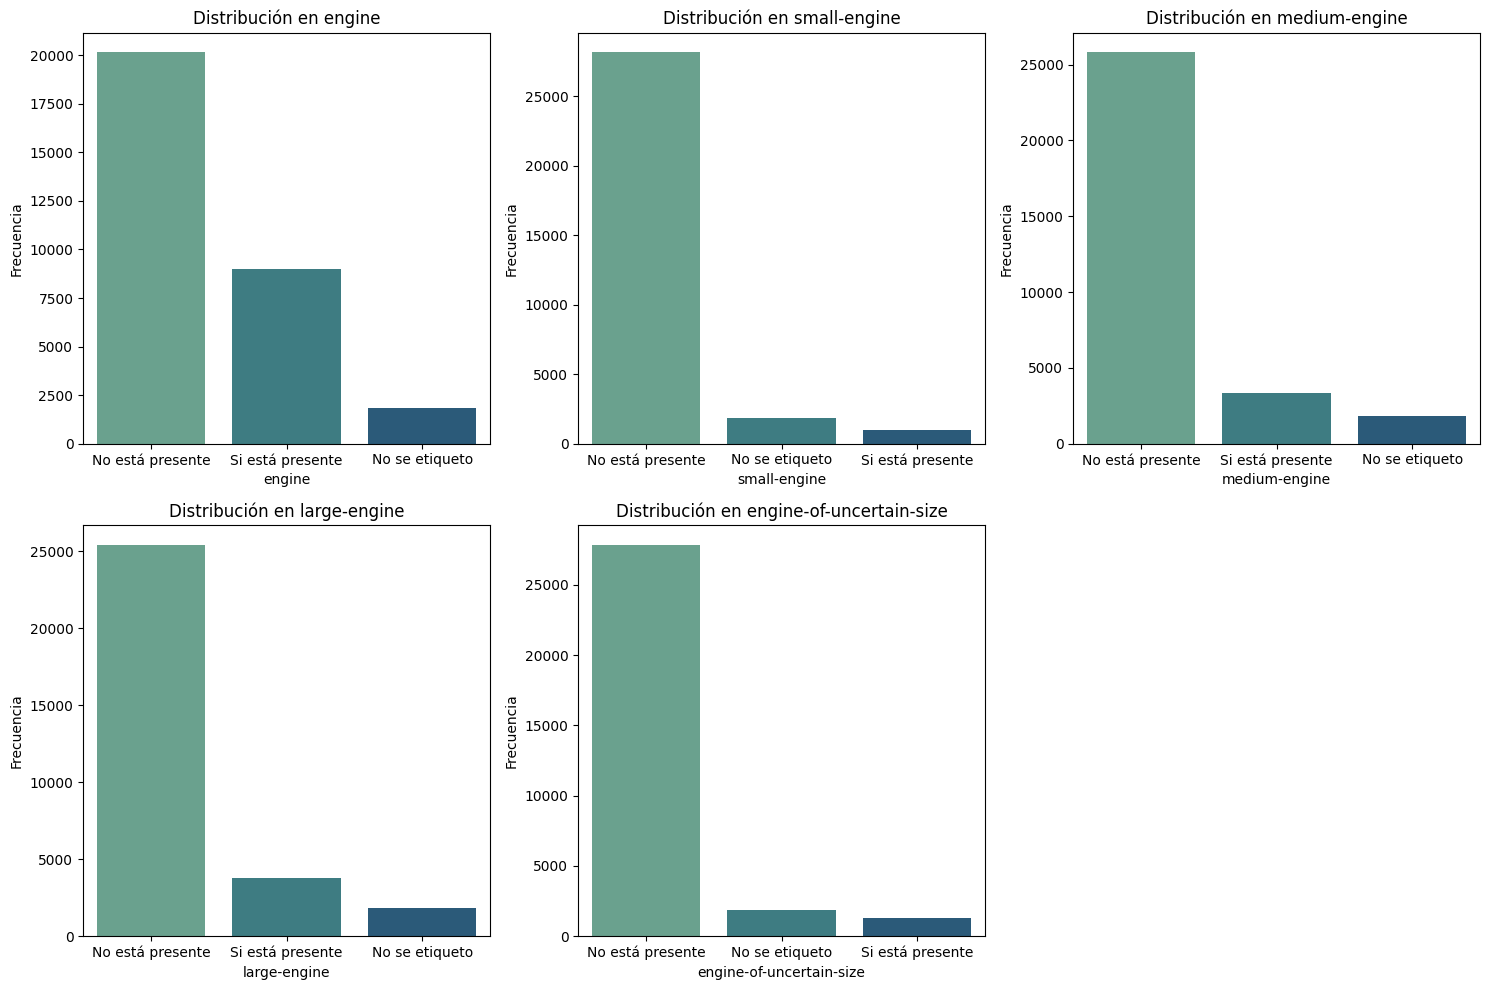

In [20]:
columnas = [
    'engine',
    'small-engine',
    'medium-engine',
    'large-engine',
    'engine-of-uncertain-size'
]

# Establecer el tamaño de la figura para que los gráficos no se solapen
plt.figure(figsize=(15, 10))

# Iterar sobre las columnas para generar un gráfico para cada una
for i, columna in enumerate(columnas, 1):
    # Calcular las frecuencias de los valores de la columna
    frequency = noise[columna].value_counts().reset_index()
    frequency.columns = [columna, 'count']

    # Crear un subplot para cada gráfico
    plt.subplot(2, 3, i)
    
    # Graficar las frecuencias
    sns.barplot(x=columna, y='count', data=frequency, palette='crest')

    # Títulos y etiquetas
    plt.title(f'Distribución en {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

- 1: Si está presente 
- 0: No está presente
- -1 : No se etiquetó 

### Analisis de periodo de tiempo

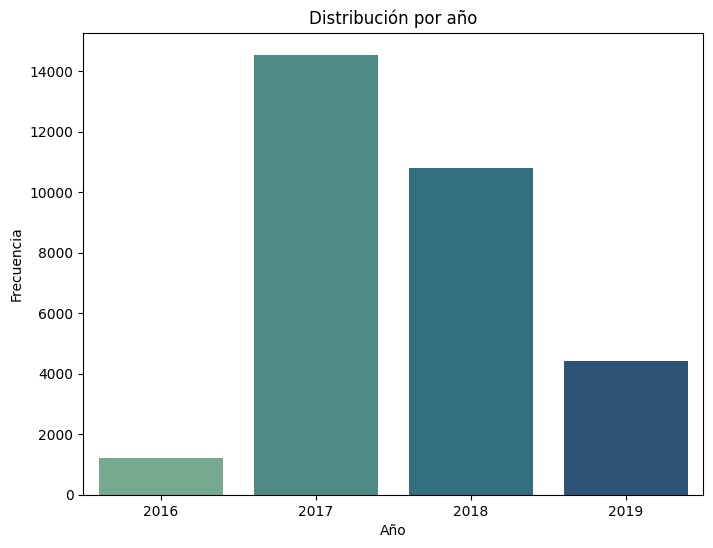

In [21]:
# Contamos las frecuencias de cada valor en 'year'
year_counts = noise['year'].value_counts().sort_index() 

# Crear un barplot 
plt.figure(figsize=(8, 6))

sns.barplot(x=year_counts.index, y=year_counts.values, palette="crest")

# Ajustar el formato del eje x para que solo aparezcan enteros
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Títulos y etiquetas
plt.title('Distribución por año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')

# Mostrar gráfico
plt.show()

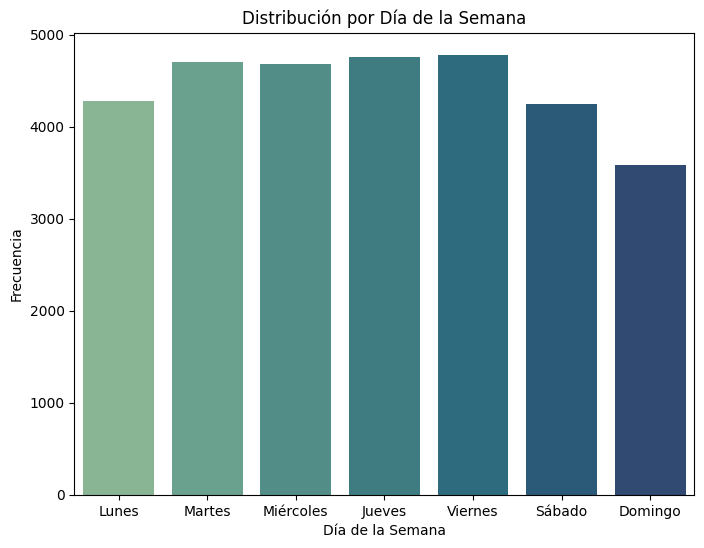

In [22]:
# Crear un diccionario que mapea los números de días a los nombres de los días
dia = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'
}

orden = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Crear un nuevo DataFrame con la columna 'day' mapeada a los días de la semana
noise_dias = noise.copy() 
noise_dias['day_name'] = noise_dias['day'].map(dia)

# Convertir la columna 'day_name' a tipo categórico con el orden especificado
noise_dias['day_name'] = pd.Categorical(noise_dias['day_name'], categories=orden, ordered=True)

# Contamos las frecuencias de cada día de la semana
day_counts = noise_dias['day_name'].value_counts().sort_index() 

plt.figure(figsize=(8, 6))

sns.barplot(x=day_counts.index, y=day_counts.values, palette="crest")

# Ajustar el formato del eje x para que solo muestre los días de la semana
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title('Distribución por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')

plt.show()

### Análisis Geográfico

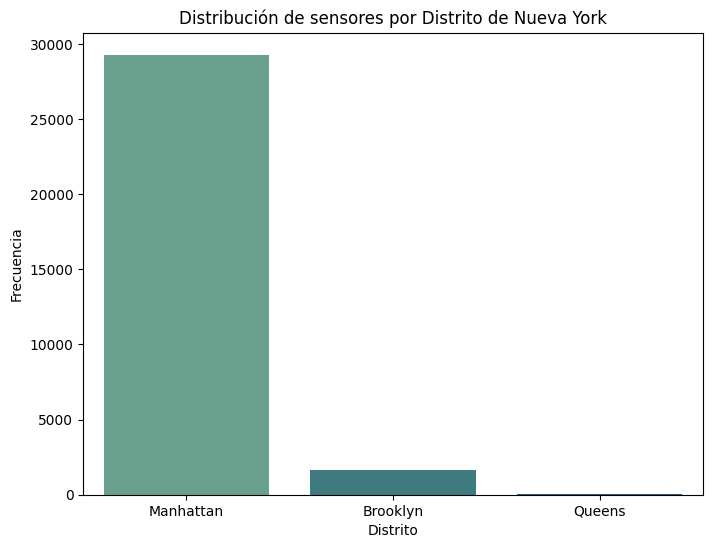

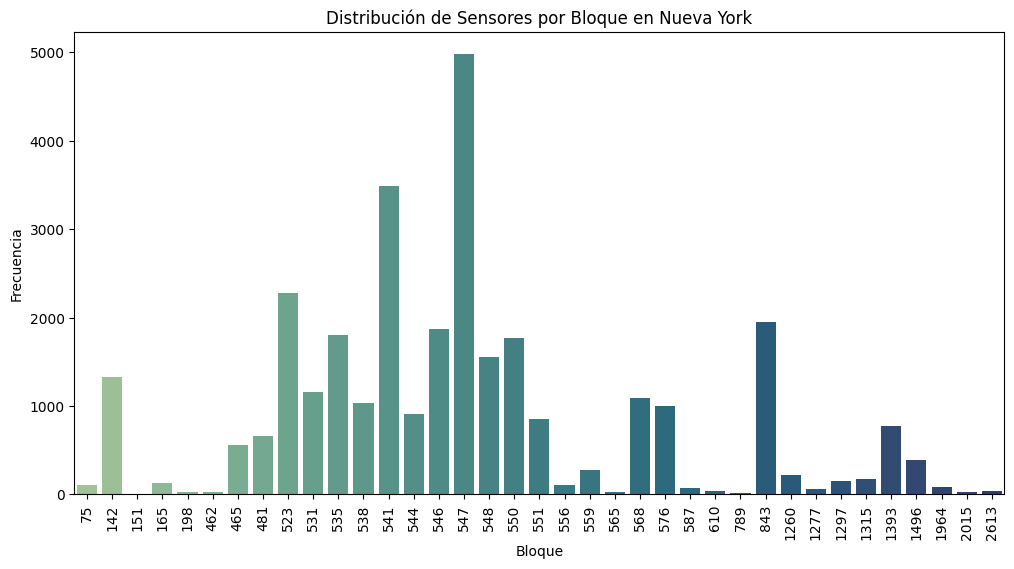

In [23]:
borough_counts = noise['borough'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=borough_counts.index, y=borough_counts.values, palette='crest')  
plt.title('Distribución de sensores por Distrito de Nueva York')
plt.xlabel('Distrito')
plt.ylabel('Frecuencia')
plt.show()

# Contar las ocurrencias de cada valor en la columna 'block'
block_counts = noise['block'].value_counts()

# Graficar la distribución de la columna 'block' usando un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=block_counts.index, y=block_counts.values, palette='crest')  # Puedes cambiar la paleta de colores
plt.title('Distribución de Sensores por Bloque en Nueva York')
plt.xlabel('Bloque')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X si son muchas
plt.show()

### Matriz de Correlación 

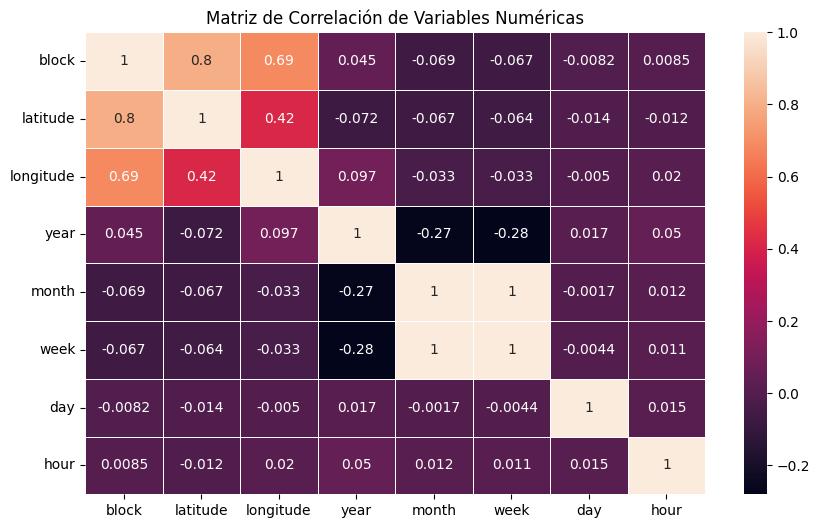

In [24]:
# Filtrar solo las columnas numéricas
noise_numeric = noise.select_dtypes(include=['number'])
# Verificar si alguna columna tiene todos los valores NaN y eliminarla
noise_numeric = noise_numeric.dropna(axis=1, how='all')
# Calcular la matriz de correlación
correlation_matrix = noise_numeric.corr()
# Crear un heatmap para visualizar la correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()